In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. ОБУЧАЕМ МОДЕЛЬ 
print("Обучение модели...")
train_df = pd.read_csv('sign_mnist_train.csv')

train_images = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
train_labels = tf.keras.utils.to_categorical(train_df['label'].values, 25)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_split=0.2, verbose=0)

print("Модель обучена!")



Обучение модели...





Модель обучена!


In [2]:
# 2. ФУНКЦИЯ ДЛЯ ПРЕДСКАЗАНИЯ
def predict_sign_language(image_path):
    """
    Распознает букву американского жестового языка по изображению
    
    Args:
        image_path: путь к изображению (желательно на белом фоне)
    
    Returns:
        predicted_letter: предсказанная буква (A-Y без J)
        confidence: уверенность модели
    """
    
    # Загружаем изображение
    try:
        img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    except:
        print(f"Ошибка: не могу загрузить изображение {image_path}")
        return None, 0
    
    # Преобразуем в массив
    img_array = image.img_to_array(img) / 255.0
    
    # Изменяем форму для модели
    img_array = img_array.reshape(1, 28, 28, 1)
    
    # Делаем предсказание
    prediction = model.predict(img_array, verbose=0)
    
    # Находим наиболее вероятный класс
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    # Преобразуем номер класса в букву
    letters = ['A','B','C','D','E','F','G','H','I','K','L','M',
               'N','O','P','Q','R','S','T','U','V','W','X','Y']
    
    predicted_letter = letters[predicted_class]
     # Визуализируем результат
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.title(f"Входное изображение\n{image_path}")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    # Показываем топ-5 предсказаний
    top_n = 5
    top_indices = np.argsort(prediction[0])[-top_n:][::-1]
    
    y_pos = np.arange(top_n)
    probabilities = prediction[0][top_indices]
    letter_labels = [letters[i] for i in top_indices]
    
    colors = ['green' if i == 0 else 'blue' for i in range(top_n)]
    plt.barh(y_pos, probabilities, color=colors)
    plt.yticks(y_pos, letter_labels)
    plt.xlabel('Вероятность')
    plt.title(f'Предсказание: {predicted_letter} ({confidence:.1%})')
    plt.xlim([0, 1])
    
    plt.tight_layout()
    plt.show()
    
    print(f" Результат распознавания:")
    print(f"   Буква: {predicted_letter}")
    print(f"   Уверенность: {confidence:.1%}")
    print(f"\n   Топ-5 предсказаний:")
    for i, idx in enumerate(top_indices):
        letter = letters[idx]
        prob = prediction[0][idx]
        print(f"   {i+1}. {letter}: {prob:.1%}")
    
    return predicted_letter, confidence

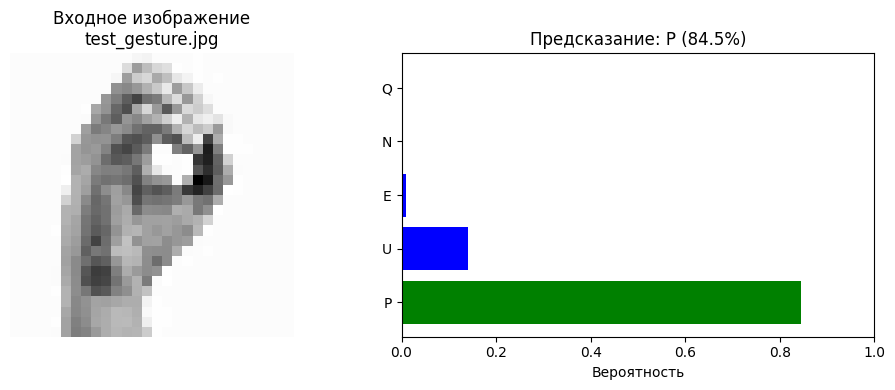

 Результат распознавания:
   Буква: P
   Уверенность: 84.5%

   Топ-5 предсказаний:
   1. P: 84.5%
   2. U: 14.1%
   3. E: 0.9%
   4. N: 0.2%
   5. Q: 0.1%
Тест на случайном изображении из датасета:


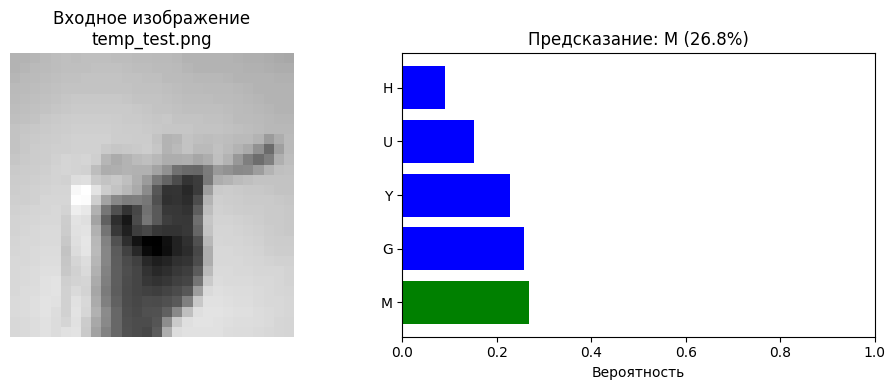

 Результат распознавания:
   Буква: M
   Уверенность: 26.8%

   Топ-5 предсказаний:
   1. M: 26.8%
   2. G: 25.8%
   3. Y: 22.8%
   4. U: 15.1%
   5. H: 9.0%
Сравнение:
   Истинная буква: U
   Предсказание:   M
   Совпадение:     НЕТ


In [3]:
# 3. ИСПОЛЬЗОВАНИЕ
# Пример 1: Предсказание для тестового изображения
if True: 
    result = predict_sign_language('test_gesture.jpg')

# Пример 2: Тест на случайном изображении из датасета
print("Тест на случайном изображении из датасета:")

test_df = pd.read_csv('sign_mnist_test.csv')
test_images = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
test_labels = test_df['label'].values

# Берем случайное изображение
random_idx = np.random.randint(0, len(test_images))
test_image = test_images[random_idx]
true_label = test_labels[random_idx]

from PIL import Image
temp_img = Image.fromarray((test_image.reshape(28, 28) * 255).astype(np.uint8))
temp_img.save('temp_test.png')

predicted_letter, confidence = predict_sign_language('temp_test.png')

# Сравниваем с истинной меткой
letters = ['A','B','C','D','E','F','G','H','I','K','L','M',
           'N','O','P','Q','R','S','T','U','V','W','X','Y']
true_letter = letters[true_label]

print(f"Сравнение:")
print(f"   Истинная буква: {true_letter}")
print(f"   Предсказание:   {predicted_letter}")
print(f"   Совпадение:     {'ДА' if predicted_letter == true_letter else 'НЕТ'}")